In [135]:
import json
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from catppuccin.flavour import Flavour

primary_color = "#"+ Flavour.latte().text.hex
secondary_color = "#"+ Flavour.latte().rosewater.hex

good_sleep = "#"+ Flavour.latte().sapphire.hex
bad_sleep = "#"+ Flavour.latte().rosewater.hex

# Load the dataset from the JSON file
with open('dataset.json', 'r') as f:
    dataset = json.load(f)

# Create a list of measurements sorted by timestamp
measurements = []
for date in dataset:
    for m in dataset[date]['measurements']:
        m['timestamp'] = datetime.fromisoformat(m['timestamp'])
        measurements.append(m)
measurements.sort(key=lambda m: m['timestamp'])

# Create a list of surveys sorted by timestamp
surveys = []
for date in dataset:
    for s in dataset[date]['surveys']:
        s['timestamp'] = datetime.fromisoformat(s['timestamp'])
        surveys.append(s)
surveys.sort(key=lambda s: s['timestamp'])

# Find the measurement closest in time to each survey, and get its comfort score
for s in surveys:
    closest_measurement = min(measurements, key=lambda m: abs(m['timestamp'] - s['timestamp']))
    s['comfort_score'] = closest_measurement['comfort_score']
    s['co2'] = closest_measurement['co2']
    s['tvoc'] = closest_measurement['tvoc']
    s['humidity'] = closest_measurement['humidity']
    s['temperature'] = closest_measurement['temperature']
    s['room_num'] = closest_measurement['room_num']






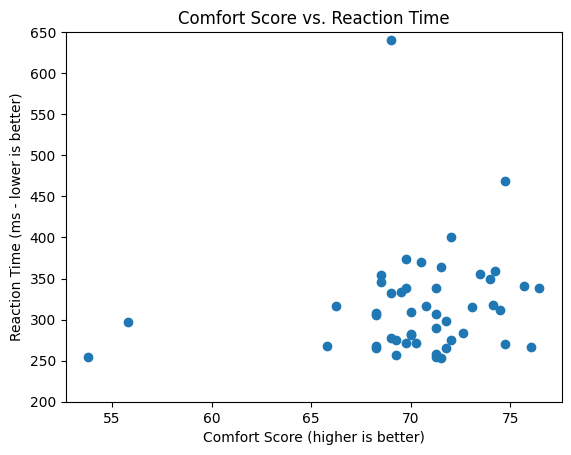

In [136]:
# Create a scatter plot of comfort scores vs. reaction times
fig, ax = plt.subplots()
ax.scatter([s['comfort_score'] for s in surveys], [s['reaction_time_ms'] for s in surveys])
ax.set_xlabel('Comfort Score (higher is better)')
ax.set_ylabel('Reaction Time (ms - lower is better)')
ax.set_title('Comfort Score vs. Reaction Time')
ax.set_ylim([200, 650]) # type: ignore
plt.show()



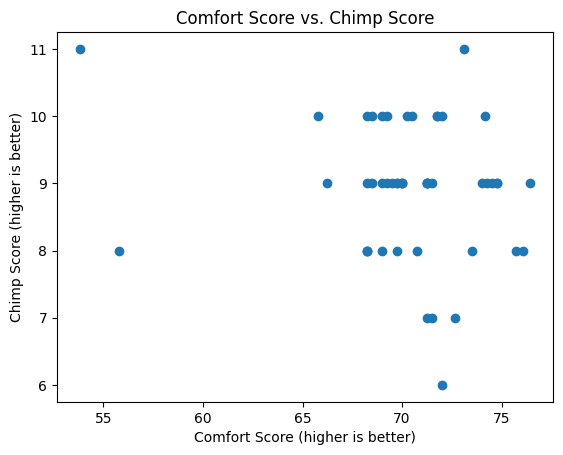

In [137]:
# Create a scatter plot of comfort scores vs. chimp scores
fig, ax = plt.subplots()
ax.scatter([s['comfort_score'] for s in surveys], [s['chimp_score'] for s in surveys])
ax.set_xlabel('Comfort Score (higher is better)')
ax.set_ylabel("Chimp Score (higher is better)")
ax.set_title('Comfort Score vs. Chimp Score')

plt.show()


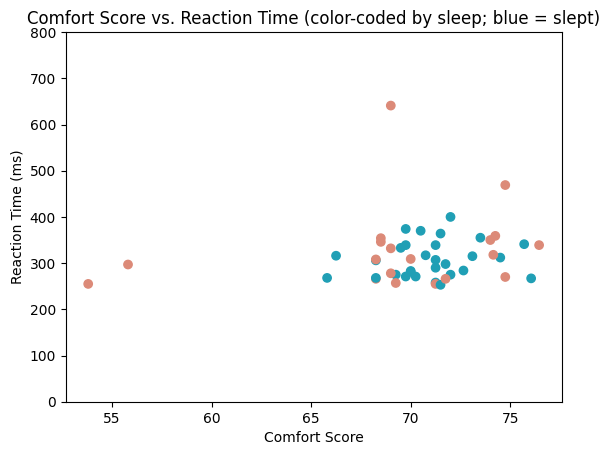

In [138]:
# create a graph that compares the reaction time ms and the aim trainer score against the comfort score, then have colors representing the sleep boolean
fig, ax = plt.subplots()
colors = [good_sleep if s['sleep'] else bad_sleep for s in surveys]
ax.scatter([s['comfort_score'] for s in surveys], [s['reaction_time_ms'] for s in surveys], c=colors)
ax.set_xlabel('Comfort Score')
ax.set_ylabel('Reaction Time (ms)')
ax.set_title('Comfort Score vs. Reaction Time (color-coded by sleep; blue = slept)')
ax.set_ylim([0, 800]) # type: ignore
plt.show()




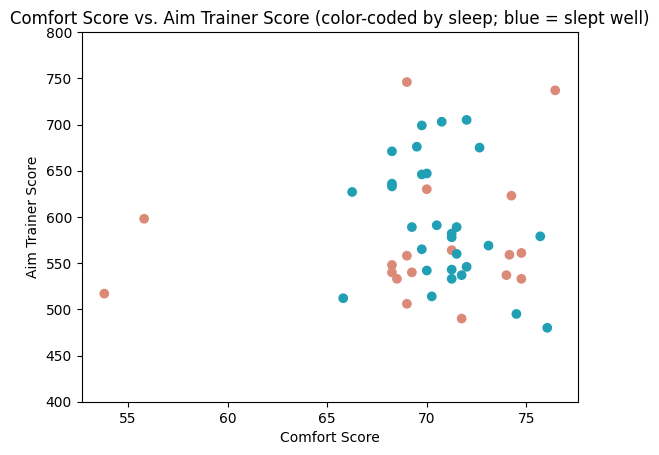

In [148]:
# Create a scatter plot of comfort scores vs. aim trainer scores, color-coded by sleep
fig, ax = plt.subplots()
colors = [good_sleep if s['sleep'] else bad_sleep for s in surveys]
ax.scatter([s['comfort_score'] for s in surveys], [s['aiming_reaction_ms'] for s in surveys], c=colors)
ax.set_xlabel('Comfort Score')
ax.set_ylabel('Aim Trainer Score')
ax.set_title('Comfort Score vs. Aim Trainer Score (color-coded by sleep; blue = slept well)')
ax.set_ylim([400, 800]) # type: ignore
plt.show()

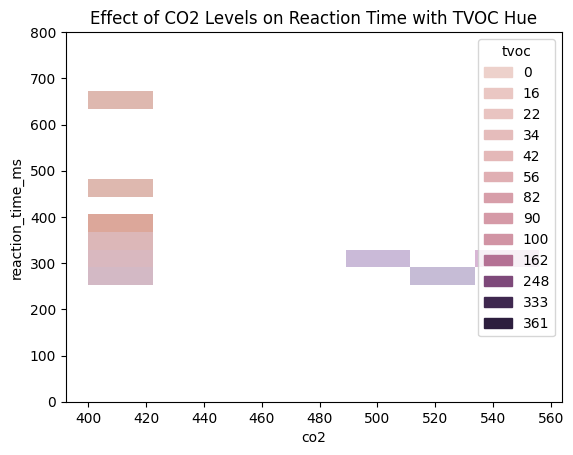

In [140]:
# Create a histogram showing the effect of CO2 levels on reaction time, with TVOC as a hue
df = pd.DataFrame(surveys)

g=sns.histplot(data=df, x="co2", y="reaction_time_ms", hue="tvoc", kde=True)
plt.title('Effect of CO2 Levels on Reaction Time with TVOC Hue')
# move the 

plt.ylim(0, 800)
plt.show()

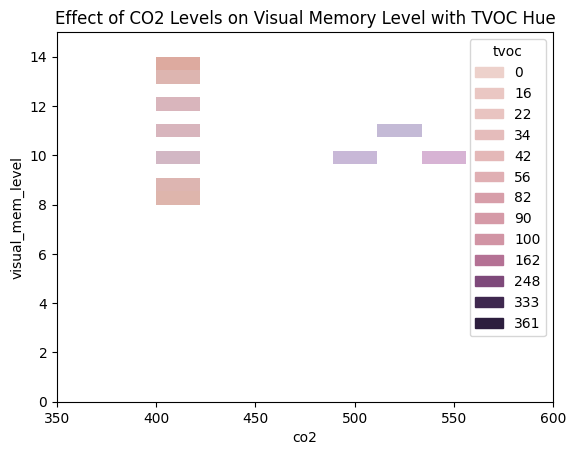

In [141]:
# repeat previous graph but with visual_mem_level 
g=sns.histplot(data=df, x="co2", y="visual_mem_level", hue="tvoc", kde=True)
plt.title('Effect of CO2 Levels on Visual Memory Level with TVOC Hue')
plt.ylim(0, 15)
plt.xlim(350, 600)
plt.show()

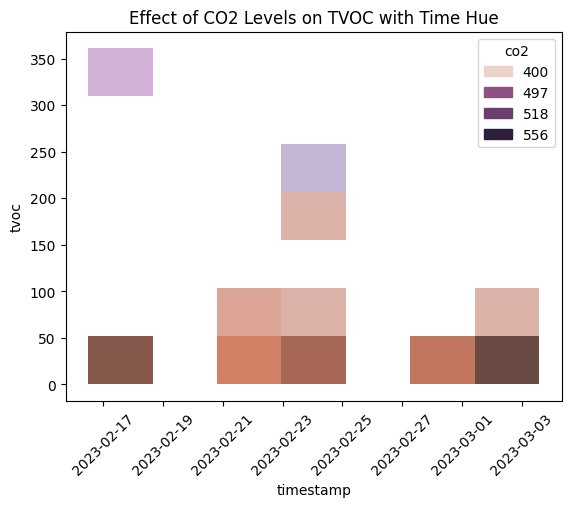

In [142]:
# make a really cool graph 
g=sns.histplot(data=df, x="timestamp", y="tvoc", hue="co2", kde=True)
plt.title('Effect of CO2 Levels on TVOC with Time Hue')

# rotate the x axis labels
plt.xticks(rotation=45)

plt.show()


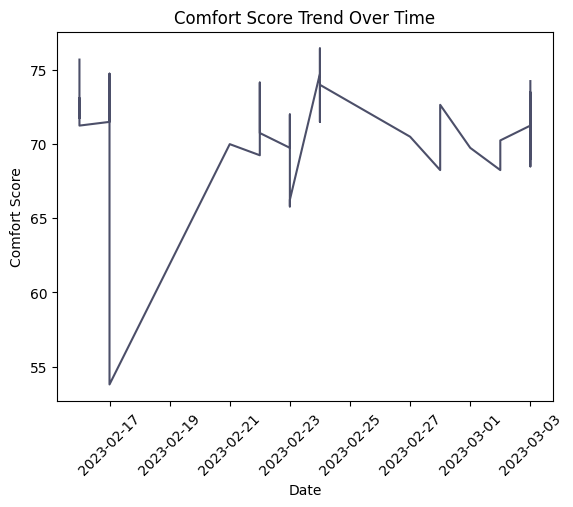

In [151]:
surveys_df = pd.DataFrame(surveys)
# Convert timestamp column to datetime
dates = [s['timestamp'].date() for s in surveys]
comfort_scores = [s['comfort_score'] for s in surveys]

# Create a line plot of comfort scores over time
fig, ax = plt.subplots()
ax.plot(dates, comfort_scores, color=primary_color)

# Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=45)



# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Comfort Score')
ax.set_title('Comfort Score Trend Over Time')
plt.show()

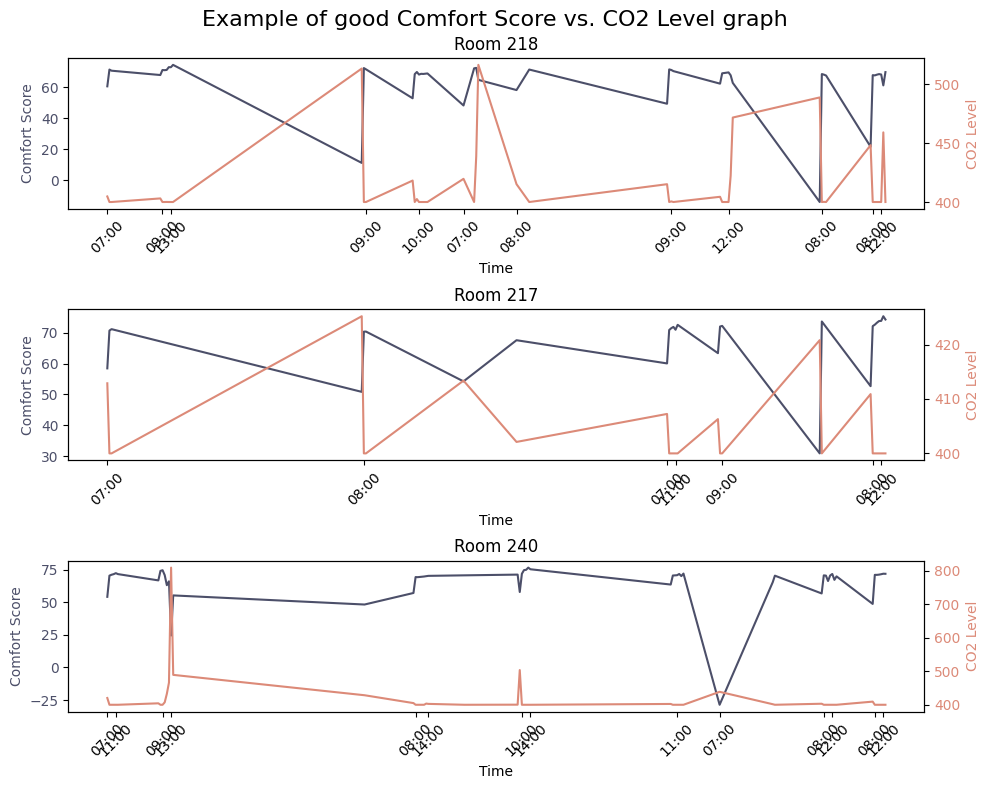

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the average comfort score and CO2 level for each day from 7 AM to 3 PM, and get the performance scores for each day
def get_daily_averages(room_num):
    daily_averages = {}
    for date in dataset:
        for m in dataset[date]['measurements']:
            if m['room_num'] == room_num and m['timestamp'].hour >= 7 and m['timestamp'].hour < 15:
                time = m['timestamp'].replace(minute=0, second=0, microsecond=0)
                if time not in daily_averages:
                    daily_averages[time] = {'comfort_score': [], 'co2': []}
                daily_averages[time]['comfort_score'].append(m['comfort_score'])
                daily_averages[time]['co2'].append(m['co2'])

    for time in daily_averages:
        daily_averages[time]['comfort_score'] = np.mean(daily_averages[time]['comfort_score'])
        daily_averages[time]['co2'] = np.mean(daily_averages[time]['co2'])

    return daily_averages

# Get the daily averages for each room
room_218 = get_daily_averages(218)
room_217 = get_daily_averages(217)
room_240 = get_daily_averages(240)

# Plot the graphs
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

room_num = [218, 217, 240]
for i, (room, ax) in enumerate(zip([room_218, room_217, room_240], axs)):
    times = list(room.keys())
    comfort_scores = [room[time]['comfort_score'] for time in times]
    co2s = [room[time]['co2'] for time in times]

    color1 = primary_color
    ax.set_xlabel('Time')
    ax.set_ylabel('Comfort Score', color=color1)
    ax.plot(times, comfort_scores, color=color1)
    ax.tick_params(axis='y', labelcolor=color1)
    ax.set_xticks(times[::4])
    ax.set_xticklabels([t.strftime('%H:%M') for t in times[::4]], rotation=45)

    ax2 = ax.twinx()

    color2 = secondary_color
    ax2.set_ylabel('CO2 Level', color=color2)
    ax2.plot(times, co2s, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    fig.tight_layout()

    ax.set_title(f'Room {room_num[i]}')

# make a master title for the whole box and make it say "Example of good Comfort Score vs. CO2 Level graph"
fig.suptitle('Example of good Comfort Score vs. CO2 Level graph', fontsize=16)
# it is overlapping with the graphs, so move it up a bit
fig.subplots_adjust(top=0.92)
plt.show()


/Users/n8sol/Library/Caches/pypoetry/virtualenvs/aq-visualise-h0nlxucY-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/n8sol/Library/Caches/pypoetry/virtualenvs/aq-visualise-h0nlxucY-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


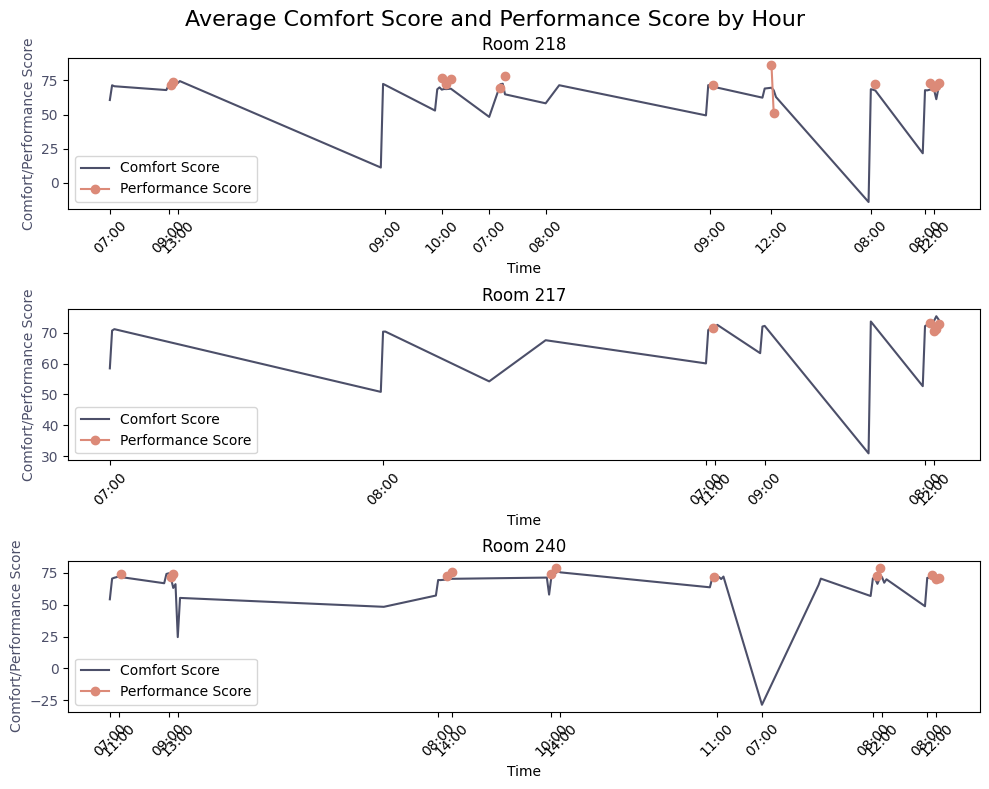

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

def get_daily_averages(room_num):
    daily_averages = {}
    for date in dataset:
        for m in dataset[date]['measurements']:
            if m['room_num'] == room_num and m['timestamp'].hour >= 7 and m['timestamp'].hour < 15:
                time = m['timestamp'].replace(minute=0, second=0, microsecond=0)
                if time not in daily_averages:
                    daily_averages[time] = {'comfort_score': [], 'performance_score': []}
                daily_averages[time]['comfort_score'].append(m['comfort_score'])
                survey_time = m['timestamp'] - timedelta(hours=1)
                for survey in dataset[date]['surveys']:
                    if survey['timestamp'].hour == survey_time.hour:
                        daily_averages[time]['performance_score'].append(survey['performance_score'])

    for time in daily_averages:
        daily_averages[time]['comfort_score'] = np.mean(daily_averages[time]['comfort_score'])
        daily_averages[time]['performance_score'] = np.mean(daily_averages[time]['performance_score'])

    return daily_averages

room_218 = get_daily_averages(218)
room_217 = get_daily_averages(217)
room_240 = get_daily_averages(240)

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

room_num = [218, 217, 240]
for i, (room, ax) in enumerate(zip([room_218, room_217, room_240], axs)):
    times = list(room.keys())
    comfort_scores = [room[time]['comfort_score'] for time in times]
    performance_scores = [room[time]['performance_score'] for time in times]

    ax.set_xlabel('Time')
    ax.set_ylabel('Comfort/Performance Score', color=color1)
    ax.plot(times, comfort_scores, color=primary_color, label='Comfort Score')
    ax.plot(times, performance_scores, color=secondary_color, marker='o', label='Performance Score')
    ax.tick_params(axis='y', labelcolor=color1)
    ax.set_xticks(times[::4])
    ax.set_xticklabels([t.strftime('%H:%M') for t in times[::4]], rotation=45)
    ax.legend()

    fig.tight_layout()

    ax.set_title(f'Room {room_num[i]}')

fig.suptitle('Average Comfort Score and Performance Score by Hour', fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()
